# Mentoría 'de cómo clasificar en géneros a las canciones'
## Práctico I : Análisis de features de audio

**Consideraciones:**
- Se evalúa el estilo y prolijidad del código.
- Se permite hacer trabajo extra, siempre y cuando las actividades básicas estén resueltas.

### 1) Plantear una pregunta que quieran responder con estos datos

Las preguntas pueden ser por ejemplo: 
- ¿Por qué este artista destaca dentro de su género?
- ¿Por qué no lo hace?
- ¿Por qué un género musical es más escuchado que otro?

Sin embargo, pueden usar cualquier afirmación que hayan leído en internet y que se pueda responder con los datos de este trabajo para validarla o rechazarla.

### 1) PREGUNTA


- ¿Las features de audio de canciones de spotify me permiten entender que hace a un genero/artista mas popular que a otro?
- ¿Podria entender con estas features por que una canción/artista es mas exitosa que otra?
 


### 2) Obtener datos para responder la pregunta

Para esto hay que hacer pedidos a la API para obtener una lista de canciones de sus artistas, de las cuáles se obtienen sus features de audio como en este [ejemplo](https://developer.spotify.com/console/get-audio-features-track/?id=17VP4tofJ3evJbtY8Tk1Qi) de la versión web de la API. Una vez obtenidos los datos, seleccionar un subconjunto de 5 o 6 features de audio y agrupar los datos en un [DataFrame de pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html).

**Recomendación** : Usar un dataframe para su artista y otro para la competencia si es que eligierone esa opción, les va a ahorrar tiempo.

**Aclaración** : Si plantearon una pregunta que no requiera los datos de la consigna, obtengan esos datos.

### Librerías

In [1]:
!pip install spotipy
!pip install pandas

# Agregar las librerías extra que se utilicen en esta celda y la siguiente

### Dependencias y acceso al API

In [22]:
# '46b333d567314a89a6254b6c6b054be6'
# '9d922c3613e441518349dcf55f7d5853'

import pandas as pd
import numpy as np
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import time 
import seaborn as sn
import matplotlib.pyplot as plt

# estos son mis propias client id y client secret 
client_id = 'e6f3a8857945407991bafd19b1ab4861'
client_secret = 'b37a45f563c84d67bf260c2cb15db215'
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)

sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [23]:
sp

In [24]:
def getTrackIDs(user, playlist_id):
    ids = []
    playlist = sp.user_playlist(user, playlist_id)
    for item in playlist['tracks']['items']:
        track = item['track']
        ids.append(track['id'])
    return ids
# es mi playlist Damian Campana nombre MENTORIA, tiene 199 canciones de musica electronica pero la api solo me deja traer 100
ids = getTrackIDs('21edvvgztpti65n55bmsc2rkq', '3e8xNUwMtOddU4aN0PHftA?si=wjOltYURQXCQ64xmOqmq9Q')

#ids = getTrackIDs('el.turquito', '2IuD0qZb14cji5y52crdsO?si=m-GWCoT7R3Oe7oXYI9cFnA')
#ids = getTrackIDs('angelicadietzel', '4R0BZVh27NUJhHGLNitU08')

<span style="color:blue">*Lo que vemos a continuacion es la cantidad total de tracks que tenemos en la playlist seleccionada y el trackid de cada una de las 100 canciones*</span>


In [26]:
print("Cantidad de canciones en la playlist:", len(ids))


print(ids)

Cantidad de canciones en la playlist: 100
['0TDLuuLlV54CkRRUOahJb4', '0U6bQIAh6MCGo1xjbIIx2S', '0YammaEkYSeo9vQYZ1OwS6', '20d27F17AZOxTJOEHAVK2Y', '4Tvw0lweq9l2JPQKFbpbBQ', '6T27IN7Ai94BeDv6PPCmoC', '46NBoIAHrmR7qcUGCIFEjR', '3A7qX2QjDlPnazUsRk5y0M', '2lYTJK94hb0fd1LQtb6Dhk', '0yl1LvI69CJrQlXJoYnU97', '5dS2dvXVPe7AR6UwBpnomW', '6krE8jQXhWRcIEmOJToVhx', '1dG3YWhLiTyFfTJyT2DanJ', '1CdlC7HKybz4EzigyfNIYd', '4f3uZW3Wc1uO2cN4WJs5nu', '7ef4DlsgrMEH11cDZd32M6', '6YUTL4dYpB9xZO5qExPf05', '5N5k9nd479b1xpDZ4usjrg', '5itOtNx0WxtJmi1TQ3RuRd', '0azC730Exh71aQlOt9Zj3y', '6KdmNK9MogmGcnO3wNZHhp', '7MmG8p0F9N3C4AXdK6o6Eb', '00cxhG668jV6gU6VK2FUVI', '6iW38RGqdDGOofmz2HeXLW', '1DFD5Fotzgn6yYXkYsKiGs', '7sYAS4CpbV90oSemgaEQat', '0v8OKUrqZGoEbgEUXScRSQ', '39cmB3ZoTOLwOTq7tMNqKa', '11xOwUHV7P1q7UpEQuMIrx', '7Feaw9WAEREY0DUOSXJLOM', '4RVtBlHFKj51Ipvpfv5ER4', '3ebXMykcMXOcLeJ9xZ17XH', '23L5CiUhw2jV1OIMwthR3S', '0rohJsT6NWsThpukt0Xxdc', '0lYBSQXN6rCTvUZvg9S0lU', '0g5EKLgdKvNlln7TNqBByK', '4UKJUbcuStnnxLeJmVJs

<span style="color:blue">*Un ejemplo de las features que tenemos en un track con la API de Spoti*</span>


In [27]:
features1 = sp.audio_features('0TDLuuLlV54CkRRUOahJb4')
features1

[{'danceability': 0.604,
  'energy': 0.787,
  'key': 0,
  'loudness': -3.674,
  'mode': 0,
  'speechiness': 0.103,
  'acousticness': 0.0679,
  'instrumentalness': 0.15,
  'liveness': 0.127,
  'valence': 0.301,
  'tempo': 126.062,
  'type': 'audio_features',
  'id': '0TDLuuLlV54CkRRUOahJb4',
  'uri': 'spotify:track:0TDLuuLlV54CkRRUOahJb4',
  'track_href': 'https://api.spotify.com/v1/tracks/0TDLuuLlV54CkRRUOahJb4',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0TDLuuLlV54CkRRUOahJb4',
  'duration_ms': 245040,
  'time_signature': 4}]

<span style="color:blue">*Con la siguiente función tomamos todas las características de las canciones que nos provee la API de spotify*</span>

https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-analysis/

In [28]:
def getTrackFeatures(id):
  meta = sp.track(id)
  features = sp.audio_features(id)

  # meta
  name = meta['name']
  album = meta['album']['name']
  artist = meta['album']['artists'][0]['name']
  release_date = meta['album']['release_date']
  length = meta['duration_ms']
  popularity = meta['popularity']

  #features
  acousticness = features[0]['acousticness']
  danceability = features[0]['danceability']
  duration_ms = features[0]['duration_ms']
  energy = features[0]['energy']
  instrumentalness = features[0]['instrumentalness']
  key= features[0]['key']
  liveness = features[0]['liveness']
  loudness = features[0]['loudness']
  mode= features[0]['mode']
  speechiness = features[0]['speechiness']
  tempo = features[0]['tempo']
  time_signature = features[0]['time_signature']
  valence= features[0]['valence']

  track = [name, album, artist, release_date, length, popularity, danceability, acousticness, danceability,duration_ms, energy, instrumentalness,key,liveness, loudness, mode,speechiness, tempo, time_signature,valence]
  return track

<span style="color:blue">*Loopeamos y tabulamos nuestros datos para darle forma al Dataset, el resultado lo guardamos en un .csv de nombre "spotify_mentoria_3.csv"*</span>


In [30]:
# loop over track ids 
"""
tracks = []
for i in range(len(ids)):
  time.sleep(.5)
  track = getTrackFeatures(ids[i])
  tracks.append(track)

# CREAMOS UN DATASET
# LUEGO DE CREARLO LAS SIGUIENTES LINEAS SE COMENTAN YA QUE TENEMOS EL DATASET LISTO EN UN CSV 
# Y NO NECESITAMOS CREARLO NUEVAMENTE EN CASO DE VOLVER A EJECUTAR EL NOTEBOOK COMPLETO

df = pd.DataFrame(tracks, columns = ['name', 'album', 'artist', 'release_date', 'length', 'popularity', 'danceability', 'acousticness', 'danceability','duration_ms', 'energy', 'instrumentalness','key','liveness', 'loudness', 'mode','speechiness', 'tempo', 'time_signature','valence'])
df.to_csv("spotify_mentoria_4.csv", sep = ',')

"""

La mayor parte del codigo hasta acá se aplicó con la siguiente fuente de referencia:

https://medium.com/better-programming/how-to-extract-any-artists-data-using-spotify-s-api-python-and-spotipy-4c079401bc37

<span style="color:blue">*Este es el dataset resultante:*</span>

In [33]:
Spotydataset=pd.read_csv('spotify_mentoria_4.csv')
Spotydataset.head(5)

,Unnamed: 0,name,album,artist,release_date,length,popularity,danceability,acousticness,danceability.1,...,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0,Titanium (feat. Sia),Nothing but the Beat (Ultimate Edition),David Guetta,2012-12-07,245040,78,0.604,0.0679,0.604,...,0.787,0.15,0,0.127,-3.674,0,0.1030,126.062,4,0.301
1,1,Instagram,Instagram,Various Artists,2019-07-05,184558,77,0.765,0.1250,0.765,...,0.906,0.00,8,0.423,-2.097,0,0.0965,96.071,4,0.950
2,2,Say My Name,7,David Guetta,2018-09-14,198946,76,0.703,0.1370,0.703,...,0.660,0.00,10,0.192,-5.119,0,0.1230,95.031,4,0.790
3,3,Conversations in the Dark,Conversations in the Dark,John Legend,2020-02-14,210236,74,0.572,0.2450,0.572,...,0.742,0.00,8,0.108,-4.589,0,0.0347,127.190,4,0.376
4,4,Better When You're Gone,Better When You're Gone,David Guetta,2019-02-08,192402,73,0.647,0.0635,0.647,...,0.795,0.00,1,0.188,-3.548,0,0.0372,127.992,4,0.409


<span style="color:blue">__COMENZAMOS CON LOS ANÁLISIS ESTADÍSTICOS TRABAJANDO UN SOLO DATASET :__ </span>

los datos se tomaron de la siguiente playlist

https://open.spotify.com/playlist/3e8xNUwMtOddU4aN0PHftA


In [34]:
Spotydataset.shape

(100, 21)

tenemos 100 canciones y 21 features en nuestro dataset

In [35]:
Spotydataset.describe()

,Unnamed: 0,length,popularity,danceability,acousticness,danceability.1,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.500000,263465.360000,55.660000,0.701990,0.082686,0.701990,263465.680000,0.737640,2.273827e-01,5.560000,0.201117,-6.027990,0.410000,0.071996,122.427100,3.980000,0.404635
std,29.011492,128391.630812,23.217557,0.121338,0.122979,0.121338,128391.605276,0.152087,3.385875e-01,3.621819,0.159345,3.060078,0.494311,0.051115,13.352856,0.140705,0.231767
min,0.000000,147026.000000,0.000000,0.224000,0.000161,0.224000,147027.000000,0.293000,0.000000e+00,0.000000,0.036500,-18.792000,0.000000,0.029500,79.979000,3.000000,0.036000
25%,24.750000,183669.000000,46.750000,0.629250,0.006467,0.629250,183669.250000,0.644000,8.250000e-07,2.000000,0.094750,-7.303250,0.000000,0.040575,120.064000,4.000000,0.205500
50%,49.500000,211091.000000,57.500000,0.713000,0.034100,0.713000,211091.500000,0.751500,1.280000e-03,6.000000,0.127000,-5.454500,0.000000,0.054350,124.986000,4.000000,0.368000
75%,74.250000,263996.000000,74.000000,0.791000,0.109500,0.791000,263997.000000,0.863250,4.985000e-01,9.000000,0.263750,-3.880500,1.000000,0.079325,127.907000,4.000000,0.593000
max,99.000000,774293.000000,93.000000,0.919000,0.692000,0.919000,774294.000000,0.954000,9.160000e-01,11.000000,0.761000,-0.478000,1.000000,0.284000,159.996000,4.000000,0.950000


In [36]:
Spotydataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 21 columns):
Unnamed: 0          100 non-null int64
name                100 non-null object
album               100 non-null object
artist              100 non-null object
release_date        100 non-null object
length              100 non-null int64
popularity          100 non-null int64
danceability        100 non-null float64
acousticness        100 non-null float64
danceability.1      100 non-null float64
duration_ms         100 non-null int64
energy              100 non-null float64
instrumentalness    100 non-null float64
key                 100 non-null int64
liveness            100 non-null float64
loudness            100 non-null float64
mode                100 non-null int64
speechiness         100 non-null float64
tempo               100 non-null float64
time_signature      100 non-null int64
valence             100 non-null float64
dtypes: float64(10), int64(7), object(4)
memory usage

<span style="color:blue">*Corroboramos si tenemos valores null en nuestros datos:*</span>

In [37]:
Spotydataset.isna().sum()

Unnamed: 0          0
name                0
album               0
artist              0
release_date        0
length              0
popularity          0
danceability        0
acousticness        0
danceability.1      0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

tenemos 0 valores nulos en los campos de nuestro dataset 

In [38]:
print("Cantidad de artistas en nuestro dataset, Artistas únicos sin repetir:", Spotydataset.artist.nunique())

print("\nNombres de Artistas/Bandas en nuestro set de datos:\n \n", Spotydataset['artist'].unique())


Cantidad de artistas en nuestro dataset, Artistas únicos sin repetir: 38

Nombres de Artistas/Bandas en nuestro set de datos:
 
 ['David Guetta' 'Various Artists' 'John Legend' 'Jessie J' 'Black Coffee'
 'Calvin Harris' 'MEDUZA' 'Alok' 'Martin Garrix' 'DJ Snake' 'Major Lazer'
 'ZHU' 'Boris Brejcha' 'Solomun' 'Noir' 'Foals' 'Monolink' 'Adriatique'
 'Marc Romboy' 'Thyladomid, Adriatique, Peter Kruder & Liem'
 'Richie Hawtin' 'Plastikman' 'Don Diablo' 'Zara Larsson' 'Tones And I'
 'Dua Lipa' 'R3HAB' 'snny' 'Alesso' 'Tiësto' 'Vindata' 'RetroVision'
 'Crash Land' 'OneRepublic' 'deadmau5' 'Dimitri Vegas, Moguai & Like Mike'
 'Charmes' 'Valdes']


In [39]:
print("Q canciones por artista en nuestro set de datos:")
Spotydataset.artist.value_counts()

Q canciones por artista en nuestro set de datos:


Don Diablo                                     11
David Guetta                                   10
Boris Brejcha                                   9
DJ Snake                                        9
Calvin Harris                                   8
MEDUZA                                          6
Martin Garrix                                   6
Alok                                            4
Dua Lipa                                        3
ZHU                                             3
Various Artists                                 2
Solomun                                         2
Marc Romboy                                     2
Vindata                                         1
snny                                            1
Plastikman                                      1
Richie Hawtin                                   1
R3HAB                                           1
Foals                                           1
deadmau5                                        1


una primera observación que podemos hacer aca, la mayoría de los artistas que vemos con 1 sola canción en el dataset son colaboraciones con otros artistas

<Figure size 1368x432 with 0 Axes>

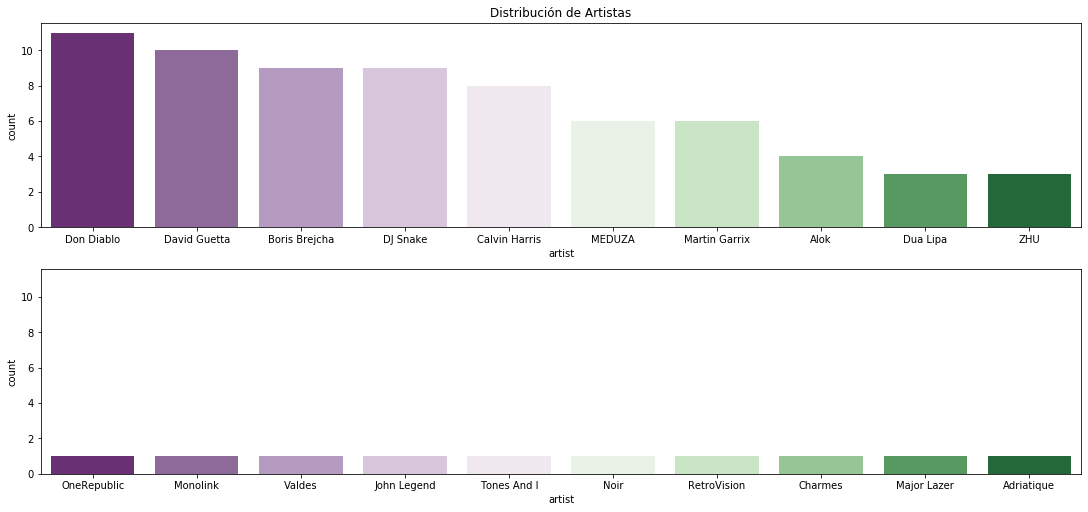

In [40]:
artist_counts = Spotydataset.artist.value_counts()

artist_counts_df = pd.DataFrame({'artist':artist_counts.index,'count':artist_counts.values})
plt.figure(figsize=(19, 6))
fig, ax =plt.subplots(2,1,constrained_layout=True, figsize=(15,7),sharey=True)
#para simplificar la visual solo se muestran 10 en la cabeza y 10 en la cola
#HEAD 10
sn.barplot(x = 'artist', y ='count', ax=ax[0],data=artist_counts_df.head(10),palette="PRGn")

ax[0].set_title("Distribución de Artistas")
#TAIL 10
sn.barplot(x = 'artist', y ='count', ax=ax[1],data=artist_counts_df.tail(10),palette="PRGn") 

<Figure size 1368x432 with 0 Axes>

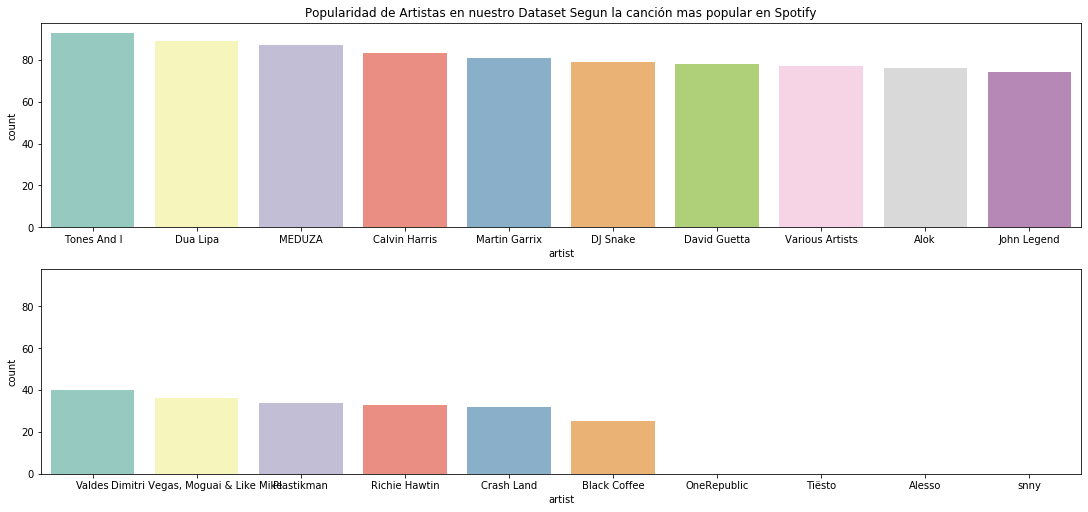

In [123]:


artist_counts = Spotydataset.groupby("artist")["popularity"].max().sort_values(ascending=False)

artist_counts_df = pd.DataFrame({'artist':artist_counts.index,'count':artist_counts.values})
plt.figure(figsize=(19, 6))
fig, ax =plt.subplots(2,1,constrained_layout=True, figsize=(15,7),sharey=True)
#para simplificar la visual solo se muestran 10 en la cabeza y 10 en la cola
#HEAD 10
sn.barplot(x = 'artist', y ='count', ax=ax[0],data=artist_counts_df.head(10),palette="Set3")

ax[0].set_title("Popularidad de Artistas en nuestro Dataset Segun la canción mas popular en Spotify")
#TAIL 10
sn.barplot(x = 'artist', y ='count', ax=ax[1],data=artist_counts_df.tail(10),palette="Set3") 

In [136]:
#pretendia mostrar una distribución de canciones por Tempo, pero el tempo esta con muchos decimales... para trabajar luego
#plt.figure(figsize=(10,6))
#plt.title('Distribución ')
#sn.distplot(Spotydataset.groupby("tempo")["artist"].count().sort_values(ascending=False))

<span style="color:blue">*Basandonos en la descripción de las características que nos provee Spotify procedemos a la selección:*</span>

https://developer.spotify.com/documentation/web-api/reference/tracks/get-several-audio-features/

In [41]:
features = ["artist","acousticness","danceability","popularity","duration_ms","energy","instrumentalness","key","liveness","mode","speechiness","tempo","time_signature","valence"]

In [42]:
Spotydataset.shape

(100, 21)

In [43]:
Spotydataset_filtrado=Spotydataset[features]
Spotydataset_filtrado.head()

,artist,acousticness,danceability,popularity,duration_ms,energy,instrumentalness,key,liveness,mode,speechiness,tempo,time_signature,valence
0,David Guetta,0.0679,0.604,78,245040,0.787,0.15,0,0.127,0,0.1030,126.062,4,0.301
1,Various Artists,0.1250,0.765,77,184558,0.906,0.00,8,0.423,0,0.0965,96.071,4,0.950
2,David Guetta,0.1370,0.703,76,198947,0.660,0.00,10,0.192,0,0.1230,95.031,4,0.790
3,John Legend,0.2450,0.572,74,210236,0.742,0.00,8,0.108,0,0.0347,127.190,4,0.376
4,David Guetta,0.0635,0.647,73,192402,0.795,0.00,1,0.188,0,0.0372,127.992,4,0.409


<span style="color:blue">*filtramos features y hemos reducido el Dataframe de 21 columnas a 14, es decir, eliminamos 7 features :*</span>

In [44]:
Spotydataset_filtrado.shape

(100, 14)

<span style="color:blue">*separamos el Dataset original en dos Dataframes 1 para un artista seleccionado y el 2 para el resto de los artistas:*</span>

In [45]:
#dataframeMona=Spotydataset['artist']=='David Guetta'
#dataframeMona.shape

df_Guetta= Spotydataset_filtrado.loc[Spotydataset.artist=='David Guetta']
df_otrosartistas = Spotydataset_filtrado.loc[Spotydataset.artist!='David Guetta']
print("DataFrame de David Guetta: ", df_Guetta.shape )
print("DataFrame de otros Artistas: ", df_otrosartistas.shape )

DataFrame de David Guetta:  (10, 14)
DataFrame de otros Artistas:  (90, 14)


In [46]:
df_Guetta.columns

Index(['artist', 'acousticness', 'danceability', 'popularity', 'duration_ms',
       'energy', 'instrumentalness', 'key', 'liveness', 'mode', 'speechiness',
       'tempo', 'time_signature', 'valence'],
      dtype='object')

### Notas Musicales "Key"

0	C (also B♯, Ddouble flat)	      DO

1	C♯, D♭ (also Bdouble sharp)	

2	D (also Cdouble sharp, Edouble flat)	     RE

3	D♯, E♭ (also Fdouble flat)	

4	E (also Ddouble sharp, F♭)	      MI

5	F (also E♯, Gdouble flat)	      FA

6	F♯, G♭ (also Edouble sharp)	

7	G (also Fdouble sharp, Adouble flat)	SOL

8	G♯, A♭	

9	A (also Gdouble sharp, Bdouble flat)	LA

10, t or A	A♯, B♭ (also Cdouble flat)	

11, e or B	B (also Adouble sharp, C♭)	SI


<span style="color:blue">*Distribución de notas musicales en tracks de David Guetta:*</span>

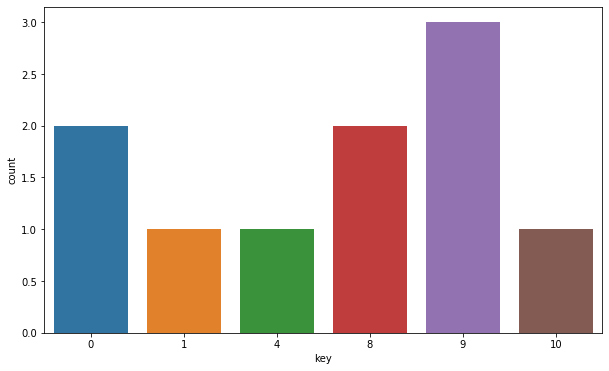

In [95]:
plt.figure(figsize=(10,6))
sn.countplot(data=df_Guetta, x='key')

<span style="color:blue">*Distribución de notas musicales en tracks de otros artistas :*</span>

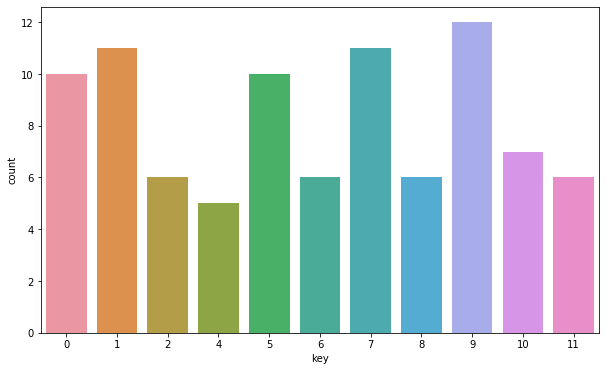

In [96]:
plt.figure(figsize=(10,6))
sn.countplot(data=df_otrosartistas, x='key')

<span style="color:blue">*Acá observamos una descripción de los estadísticos que obtenemos del dataframe con nuestro artista seleccionado David Guetta:*</span>

In [47]:
df_Guetta.describe()

,acousticness,danceability,popularity,duration_ms,energy,instrumentalness,key,liveness,mode,speechiness,tempo,time_signature,valence
count,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000e+01,10.000000,10.00000,10.000000,10.000000,10.000000,10.0,10.000000
mean,0.079757,0.586400,66.000000,198733.000000,0.787900,2.289792e-02,5.800000,0.21165,0.300000,0.064440,124.200100,4.0,0.400600
std,0.065809,0.123814,9.775252,19840.588981,0.108317,5.013416e-02,4.104198,0.14778,0.483046,0.030670,13.144495,0.0,0.188527
min,0.001270,0.367000,46.000000,172381.000000,0.650000,0.000000e+00,0.000000,0.08400,0.000000,0.032400,95.031000,4.0,0.077000
25%,0.046925,0.557750,64.250000,185913.000000,0.696000,0.000000e+00,1.750000,0.11800,0.000000,0.043950,126.041750,4.0,0.313250
50%,0.065700,0.625500,67.500000,196922.000000,0.790000,5.500000e-07,8.000000,0.18650,0.000000,0.053950,127.932500,4.0,0.387000
75%,0.111900,0.667250,72.000000,205374.750000,0.885000,4.454525e-03,9.000000,0.21675,0.750000,0.083325,127.957500,4.0,0.463750
max,0.219000,0.704000,78.000000,245040.000000,0.939000,1.500000e-01,10.000000,0.57500,1.000000,0.123000,144.937000,4.0,0.790000


<span style="color:blue">*Acá observamos una descripción de los estadísticos que obtenemos del dataframe con el resto de los artistas:*</span>

In [48]:
df_otrosartistas.describe()

,acousticness,danceability,popularity,duration_ms,energy,instrumentalness,key,liveness,mode,speechiness,tempo,time_signature,valence
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,0.083012,0.714833,54.511111,270658.200000,0.732056,0.250103,5.533333,0.199947,0.422222,0.072836,122.230100,3.977778,0.405083
std,0.128000,0.114713,24.012752,133317.820649,0.155652,0.349354,3.588997,0.161311,0.496681,0.052953,13.433837,0.148231,0.236971
min,0.000161,0.224000,0.000000,147027.000000,0.293000,0.000000,0.000000,0.036500,0.000000,0.029500,79.979000,3.000000,0.036000
25%,0.005803,0.644000,45.250000,183607.000000,0.629000,0.000005,2.000000,0.094050,0.000000,0.039925,120.038000,4.000000,0.195000
50%,0.028200,0.725500,57.000000,215423.500000,0.743000,0.002285,6.000000,0.119500,0.000000,0.054350,124.125500,4.000000,0.367000
75%,0.106025,0.795250,74.000000,290000.000000,0.861500,0.598500,9.000000,0.269250,1.000000,0.078225,126.055500,4.000000,0.603500
max,0.692000,0.919000,93.000000,774294.000000,0.954000,0.916000,11.000000,0.761000,1.000000,0.284000,159.996000,4.000000,0.950000


<span style="color:blue">*Segun la feature popularidad de Spotify la canción Dance Monkey de la artista Tone and I tiene una puntuación de 93, le sigue Break My heart de Dua Lipa con 89, ambas canciones son los 2 primeros tracks más "exitosas" de los 100 tracks que tenemos en el Dataset*</span>

In [76]:
Spotydataset.loc[Spotydataset.name=='Dance Monkey']

,Unnamed: 0,name,album,artist,release_date,length,popularity,danceability,acousticness,danceability.1,...,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
78,78,Dance Monkey,Dance Monkey (Stripped Back) / Dance Monkey,Tones And I,2019-10-17,209438,93,0.824,0.692,0.824,...,0.588,0.000104,6,0.149,-6.4,0,0.0924,98.027,4,0.513


In [77]:
Spotydataset.loc[Spotydataset.name=='Break My Heart']

,Unnamed: 0,name,album,artist,release_date,length,popularity,danceability,acousticness,danceability.1,...,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
80,80,Break My Heart,Future Nostalgia,Dua Lipa,2020-03-27,221820,89,0.73,0.167,0.73,...,0.729,0.000001,4,0.349,-3.434,0,0.0883,113.013,4,0.467


In [49]:
df_Guetta.corr()
#deberia quitar time_signature??? ya que no vamos a entrenar un modelo en esta entrega lo voy a dejar.

,acousticness,danceability,popularity,duration_ms,energy,instrumentalness,key,liveness,mode,speechiness,tempo,time_signature,valence
acousticness,1.000000,0.410311,0.431163,-0.149557,-0.521657,-0.041666,-0.053511,0.023957,-0.499481,0.382463,0.238584,NaN,0.715231
danceability,0.410311,1.000000,0.362166,0.084866,-0.041538,0.025412,-0.213014,0.569898,-0.018950,0.369290,-0.041915,NaN,0.524093
popularity,0.431163,0.362166,1.000000,0.410896,-0.097383,0.381294,-0.415425,-0.096798,-0.800055,0.638847,-0.305501,NaN,0.670923
duration_ms,-0.149557,0.084866,0.410896,1.000000,0.104675,0.550953,-0.069493,0.034874,-0.041261,0.300990,-0.111133,NaN,-0.055509
energy,-0.521657,-0.041538,-0.097383,0.104675,1.000000,0.181877,-0.245739,0.142257,0.106817,-0.150231,-0.049975,NaN,-0.395876
instrumentalness,-0.041666,0.025412,0.381294,0.550953,0.181877,1.000000,-0.688107,-0.231038,-0.288009,0.546400,0.073250,NaN,-0.241601
key,-0.053511,-0.213014,-0.415425,-0.069493,-0.245739,-0.688107,1.000000,0.234086,0.481991,-0.193151,-0.280152,NaN,0.158563
liveness,0.023957,0.569898,-0.096798,0.034874,0.142257,-0.231038,0.234086,1.000000,0.558866,-0.038724,0.185601,NaN,0.116292
mode,-0.499481,-0.018950,-0.800055,-0.041261,0.106817,-0.288009,0.481991,0.558866,1.000000,-0.443388,0.196426,NaN,-0.547581
speechiness,0.382463,0.369290,0.638847,0.300990,-0.150231,0.546400,-0.193151,-0.038724,-0.443388,1.000000,-0.513984,NaN,0.557695


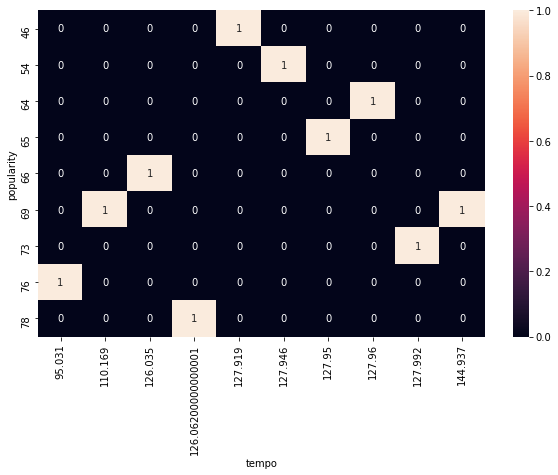

In [84]:
plt.figure(figsize=(10,6))
exp = pd.crosstab(df_Guetta.popularity, df_Guetta.tempo)
sn.heatmap(exp, annot=True)

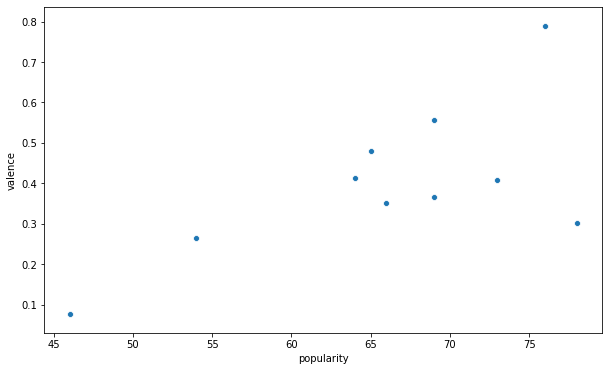

In [106]:
plt.figure(figsize=(10,6))
sn.scatterplot(data=df_Guetta, x='popularity', y='valence')

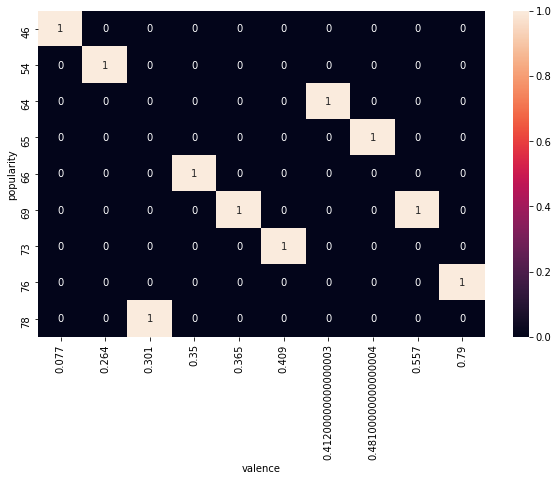

In [91]:
plt.figure(figsize=(10,6))
exp = pd.crosstab(df_Guetta.popularity, df_Guetta.valence)
sn.heatmap(exp, annot=True)

In [165]:
#por ahora dejamos comentado estas lineas por que la visualizacion es inviable 
"""
#pair plot
sn.pairplot(data=df_Mona, vars=df_Mona.columns, height=3)
#plt.title("Comparación de variables")
#['pf_identity','hf_score', 'ef_score']
plt.plot()

"""

'\n#pair plot\nsn.pairplot(data=df_Mona, vars=df_Mona.columns, height=3)\n#plt.title("Comparación de variables")\n#[\'pf_identity\',\'hf_score\', \'ef_score\']\nplt.plot()\n\n'

In [50]:
df_otrosartistas.corr()

,acousticness,danceability,popularity,duration_ms,energy,instrumentalness,key,liveness,mode,speechiness,tempo,time_signature,valence
acousticness,1.000000,0.097527,0.211465,-0.120912,-0.094522,-0.252097,0.026210,-0.080268,0.015171,-0.068301,-0.179271,0.072201,0.179738
danceability,0.097527,1.000000,0.031130,0.333108,-0.185458,0.284637,0.083812,-0.234835,0.239869,0.133806,-0.206474,-0.105945,0.240200
popularity,0.211465,0.031130,1.000000,-0.245138,0.005662,-0.285418,0.294970,-0.108008,-0.244398,-0.172338,-0.062484,0.063203,0.188335
duration_ms,-0.120912,0.333108,-0.245138,1.000000,-0.478607,0.689346,-0.094712,-0.196910,0.338058,-0.058692,-0.057550,-0.395551,-0.285367
energy,-0.094522,-0.185458,0.005662,-0.478607,1.000000,-0.266897,0.090234,0.100492,-0.265547,0.116201,0.107467,0.167576,0.188249
instrumentalness,-0.252097,0.284637,-0.285418,0.689346,-0.266897,1.000000,-0.048177,-0.141911,0.387105,-0.045556,0.139122,-0.283538,-0.427056
key,0.026210,0.083812,0.294970,-0.094712,0.090234,-0.048177,1.000000,-0.161447,-0.134048,-0.213865,-0.234909,-0.146433,-0.054990
liveness,-0.080268,-0.234835,-0.108008,-0.196910,0.100492,-0.141911,-0.161447,1.000000,-0.163557,0.073397,-0.006227,0.085472,0.002151
mode,0.015171,0.239869,-0.244398,0.338058,-0.265547,0.387105,-0.134048,-0.163557,1.000000,-0.061369,0.123208,-0.176353,-0.094582
speechiness,-0.068301,0.133806,-0.172338,-0.058692,0.116201,-0.045556,-0.213865,0.073397,-0.061369,1.000000,0.055399,0.044334,0.211087


sin correlación aparente 


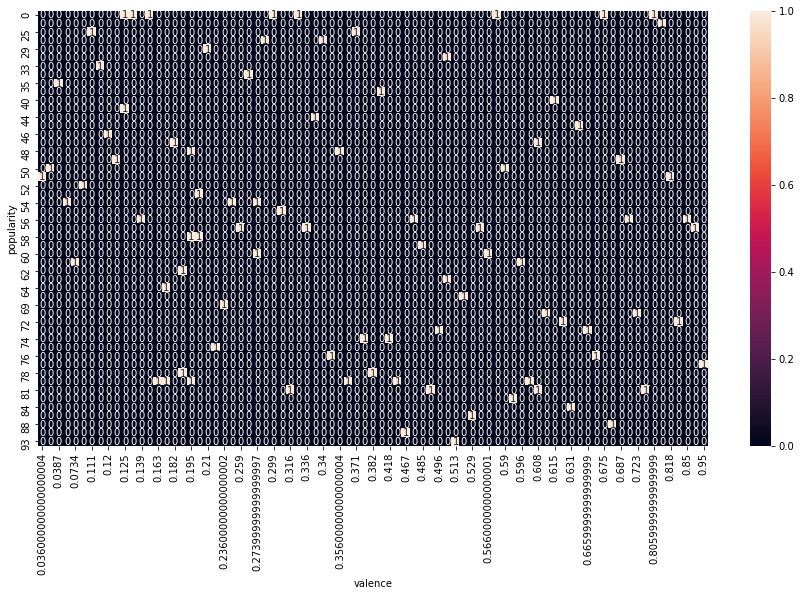

In [92]:
plt.figure(figsize=(15,8))
exp = pd.crosstab(df_otrosartistas.popularity, df_otrosartistas.valence)
sn.heatmap(exp, annot=True)

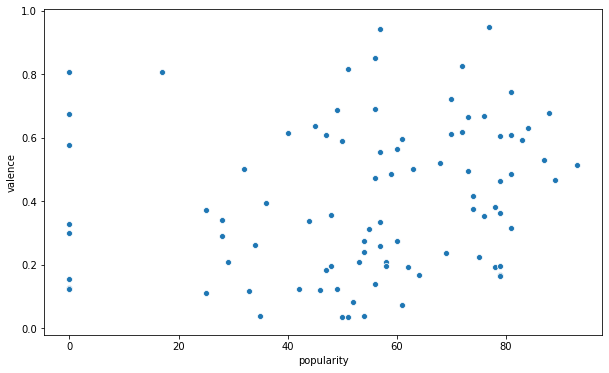

In [107]:
plt.figure(figsize=(10,6))
sn.scatterplot(data=df_otrosartistas, x='popularity', y='valence')

no hay una correlación aparente entre las variables 

In [164]:
#por ahora dejamos comentado estas lineas por que la visualizacion es inviable 
"""#pair plot
sn.pairplot(data=df_otrosartistas, vars=df_otrosartistas.columns, height=3)
#plt.title("Comparación de variables")
#['pf_identity','hf_score', 'ef_score']
plt.plot()"""

'#pair plot\nsn.pairplot(data=df_otrosartistas, vars=df_otrosartistas.columns, height=3)\n#plt.title("Comparación de variables")\n#[\'pf_identity\',\'hf_score\', \'ef_score\']\nplt.plot()'

### 3) Hacer un gráfico de estilo [radar chart](https://en.wikipedia.org/wiki/Radar_chart)  comparando a su artista o banda con 'la competencia'
En esta parte tienen que hacer los gráficos tomando como parámetros las features de audio que eligieron. Pueden usar la librería que quieran para hacer los gráficos.

**Recomendaciones** : 
- Hacer ambos gráficos en una misma figura.
- Antes de graficar, obtener los valores medios o medianos para los valores de las features. 
- Chequear los rangos de valores para cada feature antes de hacer los gráficos.

**Aclaración**: pueden usar otro tipo de gráfico si lo consideran particularmente útil para resolver su pregunta.

In [51]:
print("\033[1mTodos los valores promedios de las features del Dataframe con las canciones de David Guetta")
df_Guetta.mean(axis = 0)

Todos los valores promedios de las features del Dataframe con las canciones de David Guetta


acousticness             0.079757
danceability             0.586400
popularity              66.000000
duration_ms         198733.000000
energy                   0.787900
instrumentalness         0.022898
key                      5.800000
liveness                 0.211650
mode                     0.300000
speechiness              0.064440
tempo                  124.200100
time_signature           4.000000
valence                  0.400600
dtype: float64

In [52]:
print("\033[1mTodos los valores promedios de las features del Dataframe con las canciones del resto de los artistas")
df_otrosartistas.mean(axis = 0)

Todos los valores promedios de las features del Dataframe con las canciones del resto de los artistas


acousticness             0.083012
danceability             0.714833
popularity              54.511111
duration_ms         270658.200000
energy                   0.732056
instrumentalness         0.250103
key                      5.533333
liveness                 0.199947
mode                     0.422222
speechiness              0.072836
tempo                  122.230100
time_signature           3.977778
valence                  0.405083
dtype: float64

In [60]:
features1 = ["acousticness","danceability","energy","instrumentalness","liveness","mode","speechiness"]

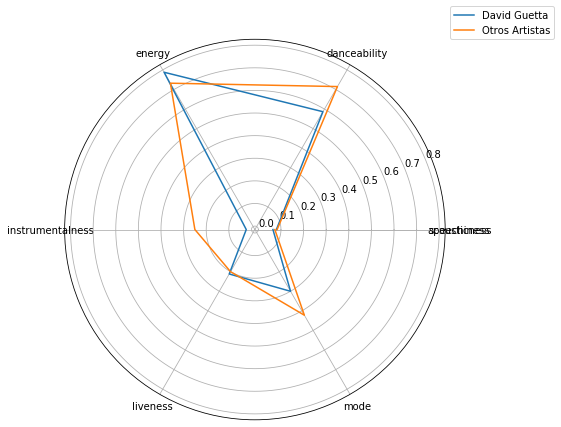

In [102]:
df_Guetta_desc = df_Guetta[features1].describe()
guetta_means = list(df_Guetta_desc.loc["mean"])

df_otros_desc = df_otrosartistas[features1].describe()
otros_means = list(df_otros_desc.loc["mean"])
labels=list(df_Guetta[features1].columns)


label_placement=np.linspace(start=0, stop=2*np.pi,num=len(guetta_means))
plt.figure(figsize=(7,7))
plt.subplot(polar=True)
plt.plot(label_placement,guetta_means, label='David Guetta')
plt.plot(label_placement,otros_means,label='Otros Artistas')
lines, labels=plt.thetagrids(np.degrees(label_placement),labels=labels)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

### 4) Escribir un informe

Este informe tiene que describir qué datos que obtuvieron, el volumen de estos (# de canciones del artista, # de canciones de la competencia, etc), una explicación de cómo estos se relacionan con la pregunta planteada, cómo ayudan a responderla y los resultados que obtuvieron. Usar la celda de abajo con formato markdown.

 ## RESPUESTA

- ¿Las features de audio de canciones de spotify me permiten entender que hace a un genero/artista mas popular que a otro?
- ¿Podria entender con estas features por que una canción/artista es mas exitosa que otra?


En primer lugar nuestro Dataset esta compuesto por 100 canciones, la playlist que utilizamos en Spotify tiene 199 tracks, cuando generamos el csv solo se guardan 100 tracks.

Estudiando la descripción de las features que nos provee Spotify podemos responder las preguntas que nos planteamos inicialmente, con estos análisis concluyo que un artista puede destacarse en ciertas features mas que en otras pero no necesariamente significa que es mas exitoso o popular que el resto de los artistas.
Por ejemplo los tracks de David Guetta se destacan en las features Energy, Liveness y Tempo, Otros Artistas superan ampliamente a Guetta en las features Acousticness, Danceability, Instrumentalness, speechiness y valence tal como visualizamos en el Radar Chart.

Los tracks de David Guetta son particularmente mas veloces que las canciones de otros artistas ya que en promedio el Tempo dos puntos mayor.
La distribución del Tempo ( beats per minute) para el set de Datos de David Guetta concentra mas tracks en producciones de 126 a 127 BPM con un promedio de 124.20 BPM, una maxima de  144 BPM y una minima de 95 BPM, mientras que las canciones del grupo otros Artistas concentran producciones principalmente en 124 a 125 BPM con un promedio de 122.24 BPM, una maxima de 159 BPM y una minima de 79 BPM 

Observamos una leve correlación entre la popularidad de los tracks de Guetta y la feature Valence, no ocurre asi en los tracks de otros artistas, valence traducido como Valencia es una medida de 0 a 1 que describe la positividad musical trasmitida por un track. Las pistas con alta valencia suenan mas positivas, por ejemplo Feliz, alegre, eufórica, mientras que las pistas con baja valencia suenan mas negativas (tristes, depresiva, furiosa) en esta feature los tracks de Guetta tienen una diferencia infima de 0.004 en contra de otros artistas. 
Este mismo comportamiento se puede encontrar cuando comparamos la media de las features de David Guetta contra la cancion mas popular en nuestro dataset segun la feature popularity=93, "Dance Monkey - Tones and I".

Las canciones de David Guetta en nuestro set de datos se concentran principalmente en las notas LA, Sol y Do, y algunas en Do#, Mi, y La# (9,8,0,1,4,10) mientras que en nuestro dataframe de otros artistas tenemos canciones escritas en todas las notas,pero particularmente las notas La, Sol, Fa, C#, y Do (9, 7, 5, 1, 0) son las mas utilizadas.

Incorporando nuevas variables/features como por ejemplo: cantidad de reproducciones de cada track, cantidad de likes, cantidad de veces compartido, cantidad de veces agregada a una playlist sumadas a las features con las que estuvimos trabajando podriamos tener una respuesta mas acertada sobre que particularidades hace a una canción/artista/album mas exitosa/o que a otra/o. 